In [1]:
# FashionMNIST: https://github.com/zalandoresearch/fashion-mnist
import gzip
import numpy as np

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)
    
x_train = open_images("train-images-idx3-ubyte.gz")
x_test = open_images("t10k-images-idx3-ubyte.gz")

y_train = open_labels("train-labels-idx1-ubyte.gz")
y_test = open_labels("t10k-labels-idx1-ubyte.gz")

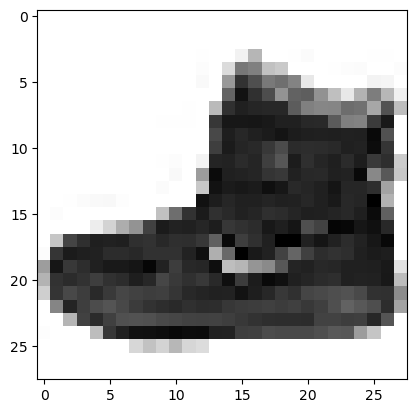

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap="gray_r")
plt.show()

In [2]:
# generate categorical from y_train model
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [13]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

model = Sequential()

model.add(Conv2D(30, kernel_size=(3,3), activation="relu", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(100, activation="sigmoid"))
model.add(Dropout(0.25))
model.add(Dense(10, activation="softmax"))
# use different optimizer like adam, rmsprops
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=10, batch_size=1000)

Epoch 1/10
60/60 [==============================] - 9s 141ms/step - loss: 1.0642 - accuracy: 0.6506
Epoch 2/10
60/60 [==============================] - 9s 155ms/step - loss: 0.5912 - accuracy: 0.8112
Epoch 3/10
60/60 [==============================] - 9s 151ms/step - loss: 0.4661 - accuracy: 0.8447
Epoch 4/10
60/60 [==============================] - 10s 165ms/step - loss: 0.4145 - accuracy: 0.8602
Epoch 5/10
60/60 [==============================] - 10s 163ms/step - loss: 0.3816 - accuracy: 0.8703
Epoch 6/10
60/60 [==============================] - 9s 149ms/step - loss: 0.3576 - accuracy: 0.8766
Epoch 7/10
60/60 [==============================] - 9s 152ms/step - loss: 0.3404 - accuracy: 0.8831
Epoch 8/10
60/60 [==============================] - 9s 144ms/step - loss: 0.3279 - accuracy: 0.8852
Epoch 9/10
60/60 [==============================] - 9s 153ms/step - loss: 0.3176 - accuracy: 0.8884
Epoch 10/10
60/60 [==============================] - 9s 144ms/step - loss: 0.3070 - accuracy: 0.89

In [6]:
Conv2D?

In [14]:
model.evaluate(x_train.reshape(-1, 28, 28, 1), y_train) # Gives accuracy from train data

1875/1875 [==============================] - 7s 4ms/step - loss: 0.2582 - accuracy: 0.9072


[0.258235365152359, 0.9072499871253967]

In [15]:
model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test) # Gives accuracy from test data

313/313 [==============================] - 1s 4ms/step - loss: 0.3047 - accuracy: 0.8917


[0.30472761392593384, 0.891700029373169]

In [16]:
p = x_test[0].reshape(1, 28, 28, 1)
p.shape

(1, 28, 28, 1)

In [17]:
# Gives the highest index of array values
np.argmax(model.predict(p))

1/1 [==============================] - 0s 100ms/step


9

In [18]:
model.predict(p)

1/1 [==============================] - 0s 24ms/step


array([[3.95665884e-05, 3.05701280e-04, 1.18016476e-04, 1.35495226e-04,
        4.72492655e-04, 1.99366780e-03, 1.72683678e-04, 6.94839889e-03,
        3.13754950e-04, 9.89500225e-01]], dtype=float32)

In [19]:
pred = model.predict(x_test.reshape(-1, 28, 28, 1))

313/313 [==============================] - 1s 4ms/step


In [20]:
# Confusion Matrix on test data
import pandas as pd

ytrue = pd.Series(np.argmax(y_test, axis = 1), name = 'actual')
ypred = pd.Series(np.argmax(pred, axis = 1), name = 'pred')

pd.crosstab(ytrue, ypred)

pred,0,1,2,3,4,5,6,7,8,9
actual,,,,,,,,,,
0,889,0,16,21,5,3,60,0,6,0
1,4,967,1,20,4,0,1,0,3,0
2,23,0,856,9,67,0,43,0,2,0
3,27,5,10,910,26,0,20,0,2,0
4,1,2,102,34,812,1,47,0,1,0
5,0,0,0,0,0,968,0,18,0,14
6,158,0,95,31,86,0,614,0,16,0
7,0,0,0,0,0,9,0,962,1,28
8,2,1,2,3,3,3,3,3,980,0
